In [ ]:
# Generating two circles with different colored dots

from sklearn.datasets import make_circles

nSamples = 1000
X, y = make_circles(nSamples, noise=0.03, random_state=42)

In [ ]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
# Creating a dataframe for circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

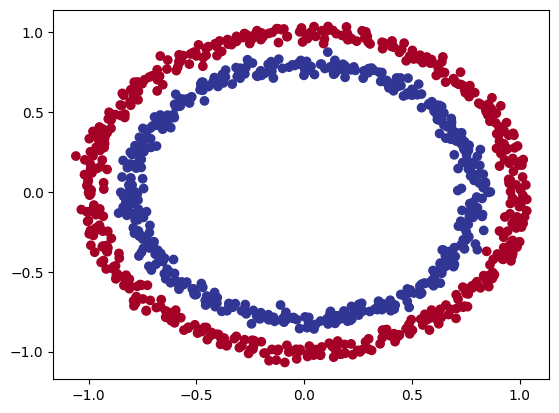

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Turning data into tensors
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Test/Train split

from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
len(XTrain), len(yTrain), len(XTest), len(yTest)

(800, 800, 200, 200)

In [ ]:
# Building model

from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device in use: {device}")

Device in use: cpu


In [ ]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer2(self.layer1(x))

model0 = CircleModel()
model0

CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [8]:
# Creating a loss function
lossFn = nn.BCEWithLogitsLoss()  # Binary Cross Entropy with sigmoid built-in

# Creating an optimizer
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

# Evaluation metric
def accuracyFunction(yTrue, yPred):
  correct = torch.eq(yTrue, yPred).sum().item()
  acc = (correct/len(yPred)) * 100
  return acc

NameError: ignored

In [ ]:
# Training model

torch.manual_seed(42)
epochs = 100

XTrain, yTrain = XTrain.to(device), yTrain.to(device)
XTest, yTest = XTest.to(device), yTest.to(device)

for epoch in range(epochs):
  model0.train()
  yLogits = model0(XTrain).squeeze()
  yPred = torch.round(torch.sigmoid(yLogits))
  loss = lossFn(yLogits, yTrain)
  acc = accuracyFunction(yTrue=yTrain, yPred=yPred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():
    testLogits = model0(XTest).squeeze()
    testPred = torch.round(torch.sigmoid(testLogits))

    testLoss = lossFn(testLogits, yTest)
    testAcc = accuracyFunction(yTrue=yTest, yPred=testPred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {testLoss:.5f}, Test Accuracy: {testAcc:.2f}%")

Epoch: 0 | Loss: 0.70516, Accuracy: 50.00% | Test Loss: 0.70007, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.69880, Accuracy: 50.00% | Test Loss: 0.69505, Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69610, Accuracy: 53.50% | Test Loss: 0.69322, Test Accuracy: 55.50%
Epoch: 30 | Loss: 0.69488, Accuracy: 53.87% | Test Loss: 0.69264, Test Accuracy: 60.00%
Epoch: 40 | Loss: 0.69427, Accuracy: 50.88% | Test Loss: 0.69254, Test Accuracy: 54.50%
Epoch: 50 | Loss: 0.69393, Accuracy: 51.38% | Test Loss: 0.69263, Test Accuracy: 52.00%
Epoch: 60 | Loss: 0.69371, Accuracy: 51.38% | Test Loss: 0.69279, Test Accuracy: 51.00%
Epoch: 70 | Loss: 0.69357, Accuracy: 50.75% | Test Loss: 0.69296, Test Accuracy: 51.00%
Epoch: 80 | Loss: 0.69346, Accuracy: 50.00% | Test Loss: 0.69314, Test Accuracy: 52.00%
Epoch: 90 | Loss: 0.69337, Accuracy: 49.75% | Test Loss: 0.69330, Test Accuracy: 53.00%


In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

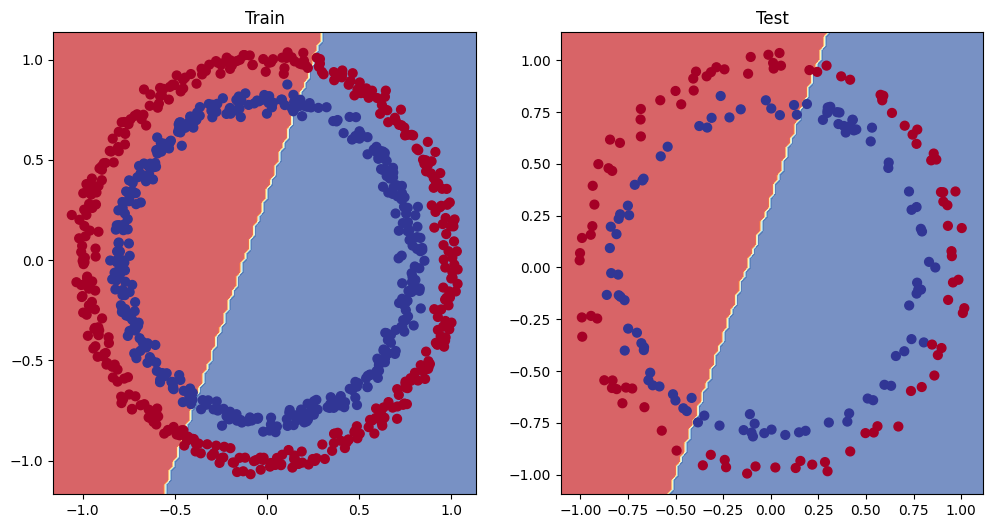

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, XTrain, yTrain)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model0, XTest, yTest)

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x)))

model1 = CircleModelV1().to(device)
model1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
lossFn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1000

XTrain, yTrain = XTrain.to(device), yTrain.to(device)
XTest, yTest = XTest.to(device), yTest.to(device)

for epoch in range(epochs):
  yLogits = model1(XTrain).squeeze()
  yPred = torch.round(torch.sigmoid(yLogits))

  loss = lossFn(yLogits, yTrain)
  acc = accuracyFunction(yTrue=yTrain, yPred=yPred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model1.eval()
  with torch.inference_mode():
    testLogits = model1(XTest).squeeze()
    testPred = torch.round(torch.sigmoid(testLogits))

    testLoss = lossFn(testLogits, yTest)
    testAcc = accuracyFunction(yTrue=yTest, yPred=testPred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {testLoss:.5f}, Test Accuracy: {testAcc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test Loss: 0.69261, Test Accuracy: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test Loss: 0.69379, Test Accuracy: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test Loss: 0.69437, Test Accuracy: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test Loss: 0.69458, Test Accuracy: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69465, Test Accuracy: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69467, Test Accuracy: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%


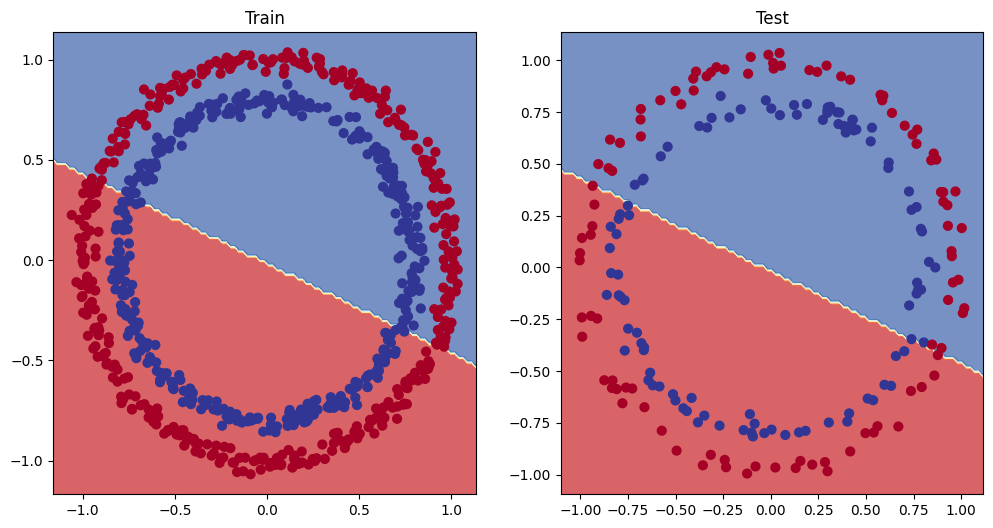

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, XTrain, yTrain)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, XTest, yTest)

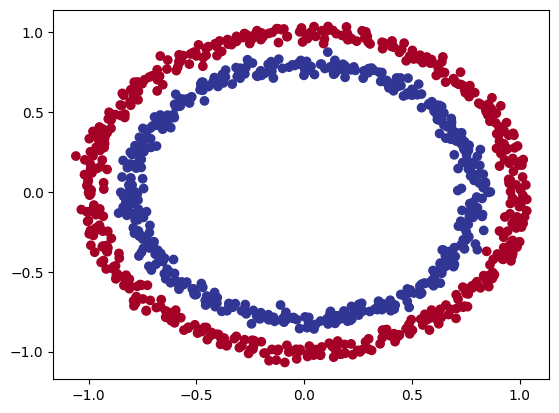

In [3]:
# Non Linearity

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

nSamples = 1000

X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [5]:
# Splitting the data
import torch
from sklearn.model_selection import train_test_split


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

XTrain[:5], yTrain[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [6]:
# Building model with non linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()  # ReLU activation function

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model3 = CircleModelV2()
print(model3)

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [13]:
# Setting up loss function and optimizer

lossFn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model3.parameters(), lr=0.2)

device = "cuda" if torch.cuda.is_available() else "cpu"

In [14]:
def accuracyFn(yTrue, yPred):
  correct = torch.eq(yTrue, yPred).sum().item()
  acc = (correct/len(yPred)) * 100
  return acc

In [16]:
# Training

torch.manual_seed(42)
epochs = 1000

XTrain, yTrain = XTrain.to(device), yTrain.to(device)
XTest, yTest = XTest.to(device), yTest.to(device)

for epoch in range(epochs):
  yLogits = model3(XTrain).squeeze()
  yPred = torch.round(torch.sigmoid(yLogits))

  loss = lossFn(yLogits, yTrain)
  acc = accuracyFn(yTrue=yTrain, yPred=yPred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model3.eval()
  with torch.inference_mode():
    testLogits = model3(XTest).squeeze()
    testPred = torch.round(torch.sigmoid(testLogits))
    testLoss = lossFn(testLogits, yTest)
    testAcc = accuracyFn(yTrue=yTest, yPred=testPred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {testLoss:.5f}, Test Accuracy: {testAcc:.2f}%")

Epoch: 0 | Loss: 0.69607, Accuracy: 50.00% | Test Loss: 0.69592, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69111, Accuracy: 51.75% | Test Loss: 0.69095, Test Accuracy: 54.00%
Epoch: 200 | Loss: 0.68760, Accuracy: 54.50% | Test Loss: 0.68787, Test Accuracy: 56.50%
Epoch: 300 | Loss: 0.67939, Accuracy: 56.75% | Test Loss: 0.68177, Test Accuracy: 55.00%
Epoch: 400 | Loss: 0.65281, Accuracy: 71.88% | Test Loss: 0.66350, Test Accuracy: 66.00%
Epoch: 500 | Loss: 0.55800, Accuracy: 94.75% | Test Loss: 0.57880, Test Accuracy: 91.00%
Epoch: 600 | Loss: 0.54374, Accuracy: 56.38% | Test Loss: 0.56088, Test Accuracy: 59.50%
Epoch: 700 | Loss: 0.32842, Accuracy: 83.38% | Test Loss: 0.38232, Test Accuracy: 78.50%
Epoch: 800 | Loss: 0.08677, Accuracy: 99.88% | Test Loss: 0.12837, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.04717, Accuracy: 99.88% | Test Loss: 0.08103, Test Accuracy: 100.00%


In [17]:
# Making predictions

model3.eval()

with torch.inference_mode():
  yPred = torch.round(torch.sigmoid(model3(XTest))).squeeze()

yPred[:10], y[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [19]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

ValueError: ignored

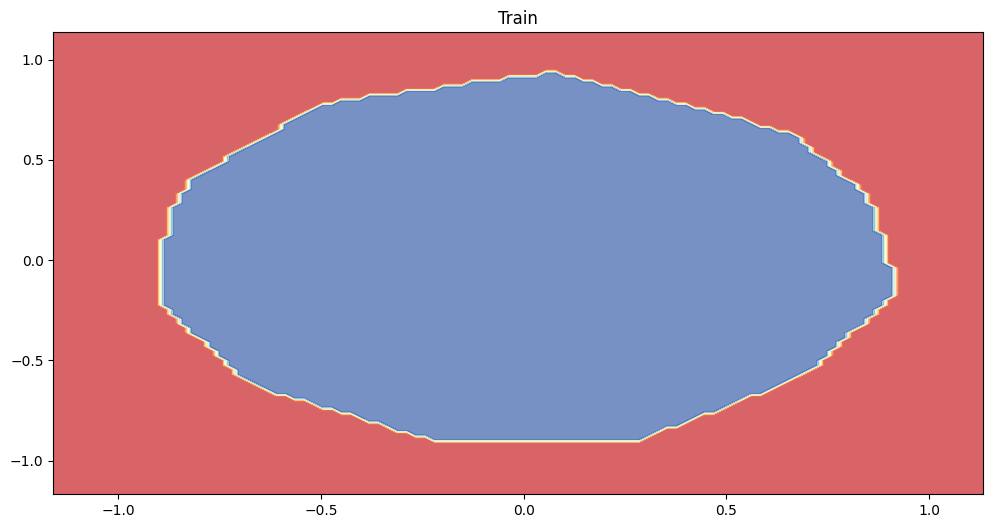

In [21]:
plt.figure(figsize=(12, 6))
plt.title("Train")
plot_decision_boundary(model3, XTrain, yTest)